In [7]:
#导入需要的包
import numpy as np
import paddle as paddle
import paddle.fluid as fluid
from PIL import Image
import matplotlib.pyplot as plt
import os
import paddle.vision.transforms as T

paddle.enable_static()

!mkdir -p /home/aistudio/.cache/paddle/dataset/mnist/
!cp -r /home/aistudio/data/data65/*  /home/aistudio/.cache/paddle/dataset/mnist/
!ls /home/aistudio/.cache/paddle/dataset/mnist/

cp: cannot stat '/home/aistudio/data/data65/*': No such file or directory
t10k-images-idx3-ubyte.gz  train-images-idx3-ubyte.gz
t10k-labels-idx1-ubyte.gz  train-labels-idx1-ubyte.gz


In [8]:
#二、数据集的准备
transform = T.Normalize(mean=[127.5], std=[127.5])
train_dataset = paddle.vision.datasets.MNIST(mode='train', transform=transform)
eval_dataset = paddle.vision.datasets.MNIST(mode='test', transform=transform)

In [9]:
print('训练集样本量: {}，验证集样本量: {}'.format(len(train_dataset), len(eval_dataset)))

训练集样本量: 60000，验证集样本量: 10000


In [10]:
# 定义网络
network = paddle.nn.Sequential(
    paddle.nn.Flatten(),           
    paddle.nn.Linear(784, 512),    
    paddle.nn.ReLU(),              
    paddle.nn.Linear(512, 10)      
)

# 定义输入和标签格式
inputs = paddle.static.InputSpec(shape=[-1, 1, 28, 28], dtype='float32', name='image')
labels = paddle.static.InputSpec(shape=[-1, 1], dtype='int64', name='label')

# 创建模型
model = paddle.Model(network, inputs, labels)

In [11]:
# 配置模型训练参数
model.prepare(
    optimizer=paddle.optimizer.Adam(learning_rate=0.001, parameters=model.parameters()),
    loss=paddle.nn.CrossEntropyLoss(),
    metrics=paddle.metric.Accuracy()
)

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/fluid/framework.py:687: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif dtype == np.bool:
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/fluid/layers/math_op_patch.py:298: UserWarning: /opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/metric/metrics.py:270
The behavior of expression A == B has been unified with equal(X, Y, axis=-1) from Paddle 2.0. If your code works well in the older versions but crashes in this version, try to use equal(X, Y, axis=0) instead of A == B. This transitional warning will be dropped in the future.
  op_type, op_

In [12]:
#五、网络训练与验证

# 训练模型
model.fit(train_dataset,
          eval_dataset,
          batch_size=64,
          epochs=5,
          verbose=1)

The loss value printed in the log is the current step, and the metric is the average value of previous step.
Epoch 1/5
step  30/938 [..............................] - loss: 0.5301 - acc: 0.6646 - ETA: 6s - 7ms/st

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/fluid/dataloader/dataloader_iter.py:89: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if isinstance(slot[0], (np.ndarray, np.bool, numbers.Number)):
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/fluid/layers/utils.py:77: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  return (isinstance(seq, collections.Sequence) and


step 938/938 [==============================] - loss: 0.1928 - acc: 0.9127 - 8ms/step        
Eval begin...
The loss value printed in the log is the current batch, and the metric is the average value of previous step.
step 157/157 [==============================] - loss: 0.0323 - acc: 0.9524 - 6ms/step         
Eval samples: 10000
Epoch 2/5
step 938/938 [==============================] - loss: 0.0439 - acc: 0.9591 - 14ms/step        
Eval begin...
The loss value printed in the log is the current batch, and the metric is the average value of previous step.
step 157/157 [==============================] - loss: 0.0112 - acc: 0.9626 - 6ms/step         
Eval samples: 10000
Epoch 3/5
step 938/938 [==============================] - loss: 0.0414 - acc: 0.9690 - 14ms/step         
Eval begin...
The loss value printed in the log is the current batch, and the metric is the average value of previous step.
step 157/157 [==============================] - loss: 0.0077 - acc: 0.9663 - 6ms/step        

Predict begin...
step 10000/10000 [==============================] - 1ms/step        
Predict samples: 10000


/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2349: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  if isinstance(obj, collections.Iterator):
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2366: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  return list(data) if isinstance(data, collections.MappingView) else data
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/image.py:425: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  a_min = np.asscalar(a_min.astype(scaled_dtype))
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/image.py:426: DeprecationWarning: np.asscalar(a) is deprecated since Num

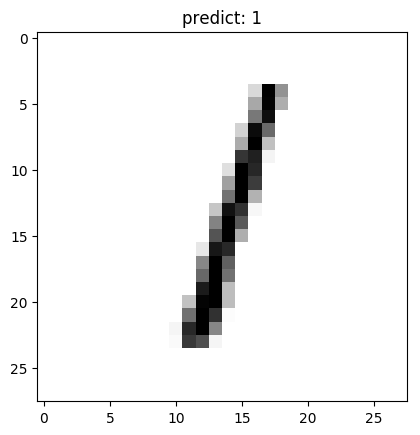

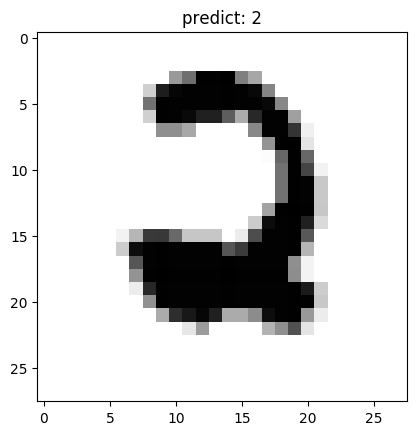

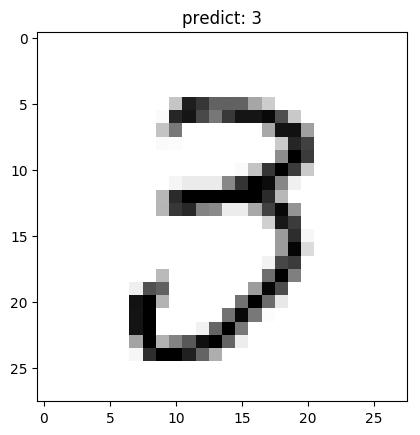

In [13]:
#六、测试模型
# 进行预测操作
result = model.predict(eval_dataset)

# 定义画图方法
def show_img(img, predict):
    plt.figure()
    plt.title('predict: {}'.format(predict))
    plt.imshow(img.reshape([28, 28]), cmap=plt.cm.binary)
    plt.show()

# 抽样展示
indexs = [2, 258, 369]

for idx in indexs:
    show_img(eval_dataset[idx][0], np.argmax(result[0][idx]))